<a href="https://colab.research.google.com/github/AAdeSantiago/AAdeSantiago.github.io/blob/master/tensor_operations_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [3]:
y = tf.random.normal(shape=(3,1))
print(y)

tf.Tensor(
[[-1.3134542]
 [-1.4107972]
 [ 1.1518352]], shape=(3, 1), dtype=float32)


TensorFlow tensors are not assignable

In [4]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

In [3]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
v.assign(tf.ones((3, 1)))

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.2919233 ],
       [-0.2661886 ],
       [-0.39760828]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [4]:
v[0, 0].assign(3.)


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
 v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

In [10]:
input_var = tf.Variable(initial_value=3.)
print(input_var.shape)
with tf.GradientTape() as tape:
 result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

()


Using the GradientTape with constant tensor inputs

In [13]:
input_const = tf.constant(3.)
print(input_const)
with tf.GradientTape() as tape:
 tape.watch(input_const)
 result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Using nested gradient tapes to compute second-order gradients

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# An end-to-end example: a linear classifier in pure TensorFlow

In [50]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [63]:
#negative_samples

In [57]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')


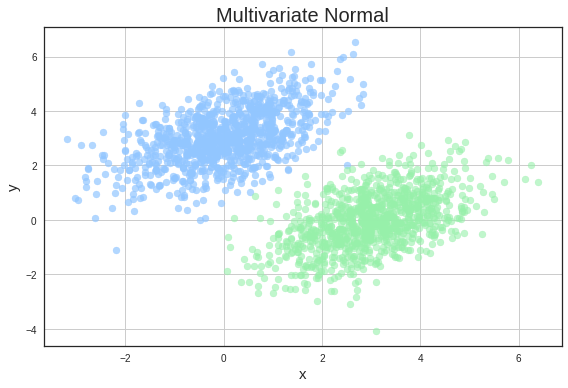

In [48]:
fig, ax = plt.subplots()
ax.scatter(negative_samples[:,0], negative_samples[:,-1], alpha = 0.7)
ax.scatter(positive_samples[:,0], positive_samples[:,-1], alpha = 0.6)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Multivariate Normal', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

Stacking the the two tensors

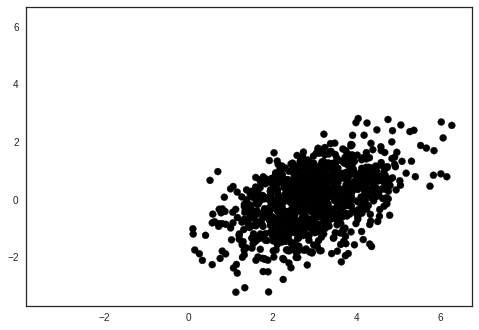

In [58]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))
#targets.shape
#inputs.shape
#import matplotlib.pyplot as plt
#plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
#plt.show()

In [60]:
#Creation of random matrix W and b
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim,)))

In [67]:
# matrix multiplication
def model(inputs):
  return tf.matmul(inputs, W) + b

# loss function (return the mean)
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Operations are recorded if they are executed within this context manager and at least one of their inputs is being "watched".  
By default, the resources held by a GradientTape are released as soon as `GradientTape.gradient()` method is called.

In [66]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss